# 이미지 분류

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/edu

/content/drive/MyDrive/edu


In [3]:
pwd

'/content/drive/MyDrive/edu'

In [5]:
!pip show tensorflow

Name: tensorflow
Version: 2.4.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: astunparse, six, gast, tensorboard, h5py, wheel, grpcio, absl-py, numpy, termcolor, flatbuffers, tensorflow-estimator, opt-einsum, protobuf, google-pasta, wrapt, keras-preprocessing, typing-extensions
Required-by: fancyimpute


In [42]:
# 라이브러리 불러오기

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [7]:
# 데이터세트 다운로드 및 탐색하기

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 1s 0us/step


In [8]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [9]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


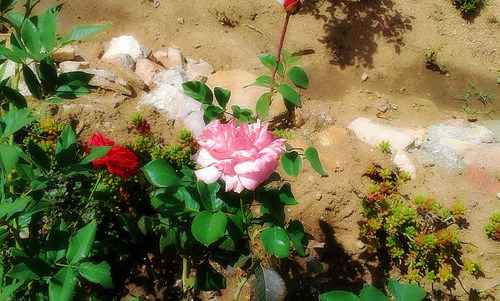

In [10]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

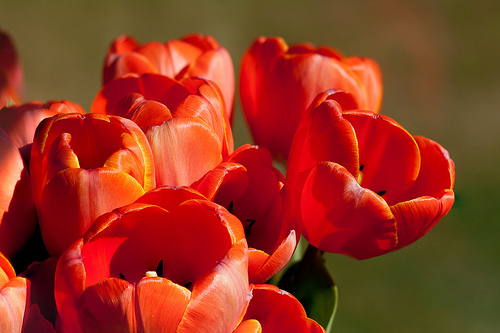

In [11]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

# 데이터셋 만들기

In [12]:
# 파라미터 정의
batch_size = 32
img_height = 180
img_width = 180

In [13]:
# 트레인셋 분할

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [14]:
# 검증 셋 분할

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [15]:
# 클래스 이름
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# 데이터 시각화

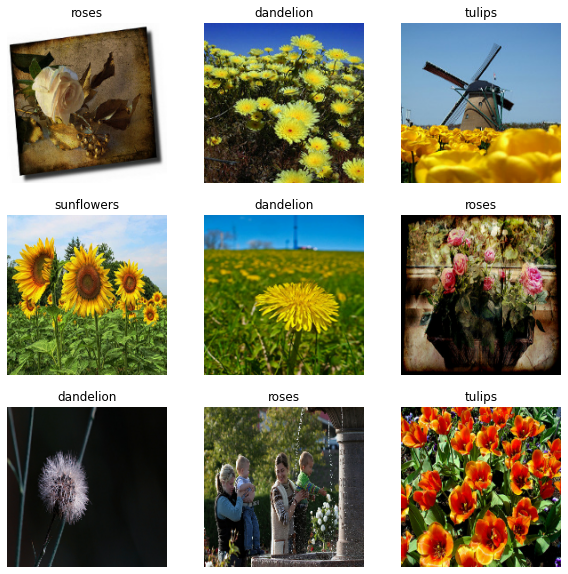

In [16]:
import matplotlib.pyplot as plt

# 출력 그래프 크기 설정
plt.figure(figsize=(10, 10))

# 첫번째 배치(32개)에서 이미지와 라벨을 가져옴
for images, labels in train_ds.take(1):
#   0~9를 순차적으로 반복하여 자리를 지정
  for i in range(9):
#     3x3 매트릭스에 차례대로 출력
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [17]:
# 배치 마다 들어있는 데이터 구조
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [18]:
# 성능을 높이기 위하여 cache() 메소드 사용
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 모델 생성 & 컴파일

In [87]:
# 설정1 - default
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(pool_size=2),
  Dropout(0.25),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(pool_size=2),
  Dropout(0.25),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [88]:
# 컴파일
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 훈련

In [89]:
epochs=15
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/15
92/92 [==============================] - 3s 26ms/step - loss: 2.4061 - accuracy: 0.2280 - val_loss: 1.3769 - val_accuracy: 0.4046
Epoch 2/15
92/92 [==============================] - 2s 24ms/step - loss: 1.2876 - accuracy: 0.4667 - val_loss: 1.2294 - val_accuracy: 0.4523
Epoch 3/15
92/92 [==============================] - 2s 25ms/step - loss: 1.0514 - accuracy: 0.5862 - val_loss: 1.1765 - val_accuracy: 0.5082
Epoch 4/15
92/92 [==============================] - 2s 24ms/step - loss: 1.0088 - accuracy: 0.6057 - val_loss: 1.1387 - val_accuracy: 0.5218
Epoch 5/15
92/92 [==============================] - 2s 25ms/step - loss: 0.8570 - accuracy: 0.6946 - val_loss: 1.0313 - val_accuracy: 0.5640
Epoch 6/15
92/92 [==============================] - 2s 25ms/step - loss: 0.6906 - accuracy: 0.7382 - val_loss: 0.9949 - val_accuracy: 0.5817
Epoch 7/15
92/92 [==============================] - 2s 24ms/step - loss: 0.4857 - accuracy: 0.8303 - val_loss: 1.0678 - val_accuracy: 0.5995
Epoch 8/15
92

In [81]:
# 테스트1
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to tulips with a 81.48 percent confidence.


In [64]:
# 테스트2
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to sunflowers with a 100.00 percent confidence.


In [90]:
# 테스트3
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to sunflowers with a 100.00 percent confidence.


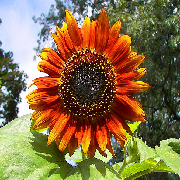

In [67]:
img

# 훈련 결과 시각화

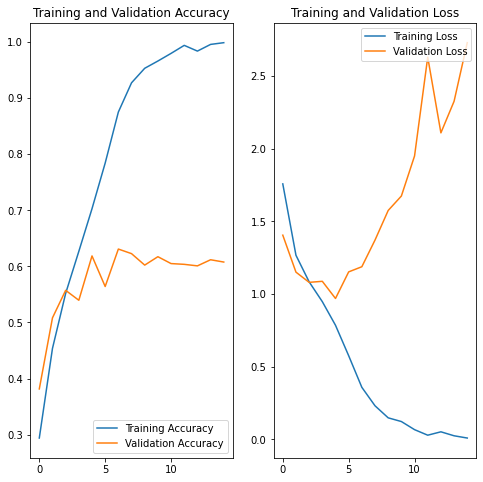

In [86]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 모델 테스트

In [66]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

In [26]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to tulips with a 54.06 percent confidence.


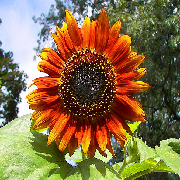

In [50]:
img

# 모델 저장

In [91]:
pwd

'/content/drive/My Drive/edu'

In [92]:
model.save('./model/my_model.h5')